In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

Using TensorFlow backend.



Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 86us/step - loss: 1.1747 - accuracy: 0.7012 - val_loss: 0.6693 - val_accuracy: 0.8350
Epoch 2/5
18000/18000 [==============================] - 2s 116us/step - loss: 0.5284 - accuracy: 0.8656 - val_loss: 0.4870 - val_accuracy: 0.8685
Epoch 3/5
18000/18000 [==============================] - 1s 71us/step - loss: 0.4219 - accuracy: 0.8846 - val_loss: 0.4207 - val_accuracy: 0.8837
Epoch 4/5
18000/18000 [==============================] - 1s 74us/step - loss: 0.3750 - accuracy: 0.8963 - val_loss: 0.3876 - val_accuracy: 0.8898
Epoch 5/5
10000/10000 [==============================] - 0s 14us/step

loss_and_metrics : [0.33895778124332426, 0.902999997138977]


In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np

np.random.seed(7)

img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 12

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_______________________________________________

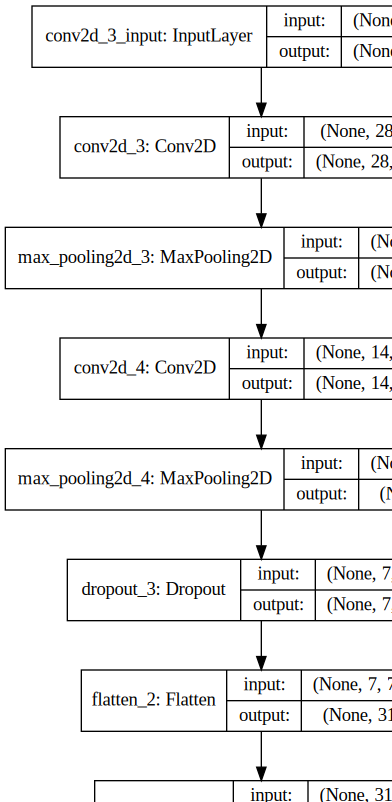

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 40s 665us/step - loss: 0.1934 - accuracy: 0.9395 - val_loss: 0.0538 - val_accuracy: 0.9824
Epoch 2/12
60000/60000 [==============================] - 39s 650us/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0326 - val_accuracy: 0.9896
Epoch 3/12
60000/60000 [==============================] - 39s 643us/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0268 - val_accuracy: 0.9913
Epoch 4/12
60000/60000 [==============================] - 38s 641us/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.0277 - val_accuracy: 0.9905
Epoch 5/12
60000/60000 [==============================] - 39s 643us/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0224 - val_accuracy: 0.9920
Epoch 6/12
60000/60000 [==============================] - 39s 642us/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 7/12
60000/60000 [==============================] 

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.023054207776101975
Test accuracy: 0.9926000237464905


In [7]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')